<a href="https://colab.research.google.com/github/Aeim/MadeWithML/blob/main/01_Data%26Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

In [1]:
import pandas as pd

# Extract

In [2]:
# Extract projects
PROJECTS_URL = "https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/projects.csv"
projects = pd.read_csv(PROJECTS_URL)
projects.head(5)

,id,created_on,title,description
0,6,2020-02-20 06:43:18,Comparison between YOLO and RCNN on real world...,Bringing theory to experiment is cool. We can ...
1,7,2020-02-20 06:47:21,"Show, Infer & Tell: Contextual Inference for C...",The beauty of the work lies in the way it arch...
2,9,2020-02-24 16:24:45,Awesome Graph Classification,"A collection of important graph embedding, cla..."
3,15,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...
4,19,2020-03-03 13:54:31,Diffusion to Vector,Reference implementation of Diffusion2Vec (Com...


In [3]:
# Extract labels (tags)
TAGS_URL = "https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/tags.csv"
tags = pd.read_csv(TAGS_URL)
tags.head(5)

,id,tag
0,6,computer-vision
1,7,computer-vision
2,9,graph-learning
3,15,reinforcement-learning
4,19,graph-learning


# Transform

In [4]:
# Join projects and tags
df = pd.merge(projects, tags, on='id')
df.head()

,id,created_on,title,description,tag
0,6,2020-02-20 06:43:18,Comparison between YOLO and RCNN on real world...,Bringing theory to experiment is cool. We can ...,computer-vision
1,7,2020-02-20 06:47:21,"Show, Infer & Tell: Contextual Inference for C...",The beauty of the work lies in the way it arch...,computer-vision
2,9,2020-02-24 16:24:45,Awesome Graph Classification,"A collection of important graph embedding, cla...",graph-learning
3,15,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...,reinforcement-learning
4,19,2020-03-03 13:54:31,Diffusion to Vector,Reference implementation of Diffusion2Vec (Com...,graph-learning


In [5]:
df = df[df.tag.notnull()] # remove projects with no tag

# Load

In [6]:
# Save locally
df.to_csv("labeled_projects.csv", index=False)

# EDA

In [7]:
from collections import Counter
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
sns.set_theme()
warnings.filterwarnings("ignore")

# Tag distribution

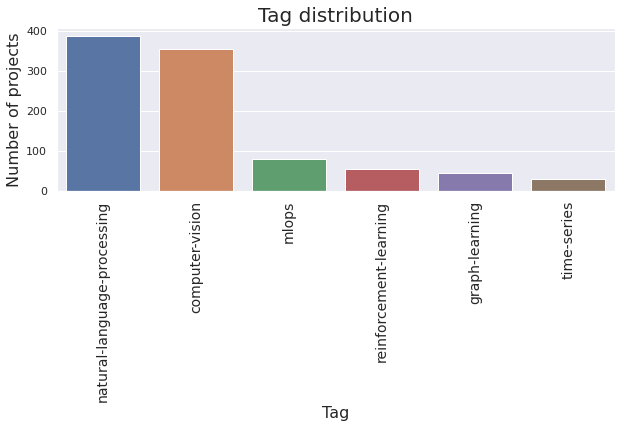

In [8]:
# Distribution of tags
tags, tag_counts = zip(*Counter(df.tag.values).most_common())
plt.figure(figsize=(10, 3))
ax = sns.barplot(list(tags), list(tag_counts))
plt.title("Tag distribution", fontsize=20)
plt.xlabel("Tag", fontsize=16)
ax.set_xticklabels(tags, rotation=90, fontsize=14)
plt.ylabel("Number of projects", fontsize=16)
plt.show()

In [9]:
# Most common tags
tags = Counter(df.tag.values)
tags.most_common()

[('natural-language-processing', 388),
 ('computer-vision', 356),
 ('mlops', 79),
 ('reinforcement-learning', 56),
 ('graph-learning', 45),
 ('time-series', 31)]

# Wordcloud

In [10]:
# Most frequent tokens for each tag
@widgets.interact(tag=list(tags))
def display_word_cloud(tag="natural-language-processing"):
  # Plot word cloud top top tags
  plt.figure(figsize=(15, 5))
  subset = df[df.tag==tag]
  text = subset.title.values
  cloud = WordCloud(
      stopwords=STOPWORDS, background_color="black", collocations=False,
    width=500, height=300).generate(" ".join(text))
  plt.axis("off")
  plt.imshow(cloud)

interactive(children=(Dropdown(description='tag', index=3, options=('computer-vision', 'graph-learning', 'rein…

# Preprocessing

# Feature engineering

In [11]:
# Feature engineering
df["text"] = df.title + " " + df.description

# Cleaning

In [12]:
!pip install nltk==3.7 -q


In [13]:
import json
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [14]:
nltk.download("stopwords")
STOPWORDS = stopwords.words("english")
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
def clean_text(text, lower=True, stem=False, stopwords=STOPWORDS):
    """Clean raw text."""
    # Lower
    if lower: 
        text = text.lower()

    # Remove stopwords
    if len(stopwords):
        pattern = re.compile(r'\b(' + r"|".join(stopwords) + r")\b\s*")
        text = pattern.sub('', text)

    # Spacing and filters
    text = re.sub(
        r"([!\"'#$%&()*\+,-./:;<=>?@\\\[\]^_`{|}~])", r" \1 ", text
    )  # add spacing between objects to be filtered
    text = re.sub("[^A-Za-z0-9]+", " ", text)  # remove non alphanumeric chars
    text = re.sub(" +", " ", text)  # remove multiple spaces
    text = text.strip()  # strip white space at the ends

    # Remove links
    text = re.sub(r"http\S+", "", text)

    # Stemming
    if stem:
        text = " ".join([stemmer.stem(word, to_lowercase=lower) for word in text.split(" ")])

    return text

In [16]:
# Toggle preprocessing parameters
@widgets.interact(lower=True, stem=False)
def display_cleaned_text(lower, stem):
    text = "Conditional image generation using Variational Autoencoders and GANs."
    cleaned_text = clean_text(text=text, lower=lower, stem=stem)
    print (cleaned_text)  

interactive(children=(Checkbox(value=True, description='lower'), Checkbox(value=False, description='stem'), Ou…

In [17]:
# Apply to dataframe
original_df = df.copy()
df.text = df.text.apply(clean_text, lower=True, stem=False)
print (f"{original_df.text.values[0]}\n{df.text.values[0]}")

Comparison between YOLO and RCNN on real world videos Bringing theory to experiment is cool. We can easily train models in colab and find the results in minutes.
comparison yolo rcnn real world videos bringing theory experiment cool easily train models colab find results minutes


# Replace labels

In [18]:
import json

In [19]:
# Accepted tags (external constraint)
ACCEPTED_TAGS = ["natural-language-processing", "computer-vision", "mlops", "graph-learning"]

In [20]:
# Out of scope (OOS) tags
oos_tags = [item for item in df.tag.unique() if item not in ACCEPTED_TAGS]
oos_tags

['reinforcement-learning', 'time-series']

In [21]:
# Samples with OOS tags
oos_indices = df[df.tag.isin(oos_tags)].index
df[df.tag.isin(oos_tags)].head()

,id,created_on,title,description,tag,text
3,15,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...,reinforcement-learning,awesome monte carlo tree search curated list m...
37,121,2020-03-24 04:56:38,Deep Reinforcement Learning in TensorFlow2,deep-rl-tf2 is a repository that implements a ...,reinforcement-learning,deep reinforcement learning tensorflow2 deep r...
67,218,2020-04-06 11:29:57,Distributional RL using TensorFlow2,🐳 Implementation of various Distributional Rei...,reinforcement-learning,distributional rl using tensorflow2 implementa...
74,239,2020-04-06 18:39:48,Prophet: Forecasting At Scale,Tool for producing high quality forecasts for ...,time-series,prophet forecasting scale tool producing high ...
95,277,2020-04-07 00:30:33,Curriculum for Reinforcement Learning,Curriculum learning applied to reinforcement l...,reinforcement-learning,curriculum reinforcement learning curriculum l...


In [22]:
# Replace this tag with "other"
df.tag = df.tag.apply(lambda x: "other" if x in oos_tags else x)
df.iloc[oos_indices].head()

,id,created_on,title,description,tag,text
3,15,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...,other,awesome monte carlo tree search curated list m...
37,121,2020-03-24 04:56:38,Deep Reinforcement Learning in TensorFlow2,deep-rl-tf2 is a repository that implements a ...,other,deep reinforcement learning tensorflow2 deep r...
67,218,2020-04-06 11:29:57,Distributional RL using TensorFlow2,🐳 Implementation of various Distributional Rei...,other,distributional rl using tensorflow2 implementa...
74,239,2020-04-06 18:39:48,Prophet: Forecasting At Scale,Tool for producing high quality forecasts for ...,other,prophet forecasting scale tool producing high ...
95,277,2020-04-07 00:30:33,Curriculum for Reinforcement Learning,Curriculum learning applied to reinforcement l...,other,curriculum reinforcement learning curriculum l...


In [23]:
# Minimum frequency required for a tag
min_freq = 75
tags = Counter(df.tag.values)

In [24]:
# Tags that just made / missed the cut
@widgets.interact(min_freq=(0, tags.most_common()[0][1]))
def separate_tags_by_freq(min_freq=min_freq):
  tags_above_freq = Counter(tag for tag in tags.elements()
                                  if tags[tag] >= min_freq)
  tags_below_freq = Counter(tag for tag in tags.elements()
                                  if tags[tag] < min_freq)
  print("Most popular tags:\n", tags_above_freq.most_common(3))
  print("\nTags that just made the cut:\n", tags_above_freq.most_common())
  print("\nTags that just missed the cut:\n", tags_below_freq.most_common())

interactive(children=(IntSlider(value=75, description='min_freq', max=388), Output()), _dom_classes=('widget-i…

In [25]:
def filter(tag, include=[]):
  """Determine if a given tag is to be included."""
  if tag not in include:
    tag = None
  return tag

In [26]:
# Filter tags that have fewer than <min_freq> occurrences
tags_above_freq = Counter(tag for tag in tags.elements()
                          if (tags[tag] >= min_freq))
df.tag = df.tag.apply(filter, include=list(tags_above_freq.keys()))

In [27]:
# Fill None with other
df.tag = df.tag.fillna("other")

# Encoding

In [28]:
import numpy as np
import random

In [29]:
# Get data
X = df.text.to_numpy()
y = df.tag

In [30]:
class LabelEncoder(object):
  """Encode labels into unique indices"""
  def __init__(self, class_to_index={}):
    self.class_to_index = class_to_index or {} # mutable defaults ;)
    self.index_to_class = {v: k for k, v in self.class_to_index.items()}
    self.classes = list(self.class_to_index.keys())

  def __len__(self):
    return len(self.class_to_index)
  
  def __str__(self):
    return f"<LabelEncoder(num_classes={len(self)})>"
  
  def fit(self, y):
    classes = np.unique(y)
    for i, class_ in enumerate(classes):
      self.class_to_index[class_] = i
    self.index_to_class = {v: k for k, v in self.class_to_index.items()}
    self.classes = list(self.class_to_index.keys())
    return self

  def encode(self, y):
    encoded = np.zeros((len(y)), dtype=int)
    for i, item in enumerate(y):
      encoded[i] = self.class_to_index[item]
    return encoded
  
  def decode(self, y):
    classes = []
    for i, item in enumerate(y):
      classes.append(self.index_to_class[item])
    return classes

  def save(self, fp):
    with open(fp, "w") as fp:
      contents = {"class_to_index": self.class_to_index}
      json.dump(contents, fp, indent=4, sort_keys=False)

  @classmethod
  def load(cls, fp):
    with open(fp, "r") as fp:
      kwargs = json.load(fp=fp)
    return cls(**kwargs)

In [31]:
# Encode
label_encoder = LabelEncoder()
label_encoder.fit(y)
num_classes = len(label_encoder)

In [32]:
label_encoder.class_to_index

{'computer-vision': 0,
 'mlops': 1,
 'natural-language-processing': 2,
 'other': 3}

In [33]:
label_encoder.index_to_class

{0: 'computer-vision',
 1: 'mlops',
 2: 'natural-language-processing',
 3: 'other'}

In [34]:
# Encode
label_encoder.encode(["computer-vision", "mlops", "mlops"])

array([0, 1, 1])

In [35]:
# Decode
label_encoder.decode(np.array([0, 1, 1]))

['computer-vision', 'mlops', 'mlops']

In [36]:
# Encode all our labels
y = label_encoder.encode(y)
print(y.shape)

(955,)


# Splitting

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
# Split sizes
train_size = 0.7
val_size = 0.15
test_size = 0.15

In [39]:
# Split (train)
X_train, X_, y_train, y_ = train_test_split(
    X, y, train_size=train_size, stratify=y)

In [40]:
print(f"train: {len(X_train)} ({(len(X_train) / len(X)):.2f})\n"
      f"remaining: {len(X_)} ({(len(X_) / len(X)):.2f})")

train: 668 (0.70)
remaining: 287 (0.30)


In [41]:
# Split (test)
X_val, X_test, y_val, y_test = train_test_split(
    X_, y_, train_size=0.5, stratify=y_)

In [42]:
print(f"train: {len(X_train)} ({(len(X_train)/len(X)):.2f})\n"
      f"val: {len(X_val)} ({(len(X_val)/len(X)):.2f})\n"
      f"test: {len(X_test)} ({(len(X_test)/len(X)):.2f})\n")

train: 668 (0.70)
val: 143 (0.15)
test: 144 (0.15)



In [43]:
# Get counts for each class
counts = {}
counts["train_counts"] = {tag: label_encoder.decode(y_train).count(tag) for tag in label_encoder.classes}
counts["val_counts"] = {tag: label_encoder.decode(y_val).count(tag) for tag in label_encoder.classes}
counts["test_counts"] = {tag: label_encoder.decode(y_test).count(tag) for tag in label_encoder.classes}


In [44]:
# View distributions
pd.DataFrame({
    "train": counts["train_counts"],
    "val": counts["val_counts"],
    "test": counts["test_counts"]
}).T.fillna(0)

,computer-vision,mlops,natural-language-processing,other
train,249,55,272,92
val,53,12,58,20
test,54,12,58,20


In [45]:
# Adjust counts across splits
for k in counts["val_counts"].keys():
  counts["val_counts"][k] = int(counts["val_counts"][k] * \
                                (train_size/val_size))
for k in counts["test_counts"].keys():
  counts["test_counts"][k] = int(counts["test_counts"][k] * \
                                 (train_size/test_size))

In [46]:
dist_df = pd.DataFrame({
    "train": counts["train_counts"],
    "val": counts["val_counts"],
    "test": counts["test_counts"]
}).T.fillna(0)
dist_df

,computer-vision,mlops,natural-language-processing,other
train,249,55,272,92
val,247,56,270,93
test,252,56,270,93


In [47]:
# Standard deviation
np.mean(np.std(dist_df.to_numpy(), axis=0))

0.9851056877051131

In [48]:
train_df = pd.DataFrame({"text": X_train, "tag": label_encoder.decode(y_train)})
val_df = pd.DataFrame({"text": X_val, "tag": label_encoder.decode(y_val)})
test_df = pd.DataFrame({"text": X_test, "tag": label_encoder.decode(y_test)})
train_df.head()

,text,tag
0,autosweep recovering 3d editable objects singl...,computer-vision
1,dpod pose estimator pytorch recreation sota 6d...,computer-vision
2,torchcde differentiable controlled differentia...,other
3,frimcla framework image classification frimcla...,computer-vision
4,trump social chrome plugin ai driven browser e...,computer-vision


# Augmentation

In [49]:
!pip install nlpaug==1.1.0 transformers==3.0.2 -q
!pip install snorkel==0.9.8 -q

In [50]:
import nlpaug.augmenter.word as naw


RuntimeError: ignored

In [51]:
# Load tokenizers and transformers
substitution = naw.ContextualWordEmbsAug(model_path="distilbert-base-uncased", action="substitute")
insertion = naw.ContextualWordEmbsAug(model_path="distilbert-base-uncased", action="insert")
text = "Conditional image generation using Variational Autoencoders and GANs."

In [52]:
# Substitutions
substitution.augment(text)

'dynamic image resolution involves variational processing and gans.'

In [53]:
# Insertions
insertion.augment(text)

'conditional image signal generation using variational binary autoencoders generators and feedback gans.'

In [54]:
# Replace dashes from tags & aliases
def replace_dash(x):
  return x.replace("-", " ")

In [55]:
# Aliases
aliases_by_tag = {
    "computer-vision": ["cv", "vision"],
    "mlops": ["production"],
    "natural-language-processing": ["nlp", "nlproc"]
}

In [56]:
# Flatten dict
flattened_aliases = {}
for tag, aliases in aliases_by_tag.items():
  tag = replace_dash(x=tag)
  if len(aliases):
    flattened_aliases[tag] = aliases
  for alias in aliases:
    _aliases = aliases + [tag]
    _aliases.remove(alias)
    flattened_aliases[alias] = _aliases

In [57]:
print(flattened_aliases["natural language processing"])
print(flattened_aliases["nlp"])

['nlp', 'nlproc']
['nlproc', 'natural language processing']


In [58]:
# We want to match with the whole word only
print("gan" in "This is a gan.")
print("gan" in "This is gandalf.")

True
True


In [59]:
# \b matches spaces
def find_word(word, text):
  word = word.replace("+", "\+")
  pattern = re.compile(fr"\b({word})\b", flags=re.IGNORECASE)
  return pattern.search(text)

In [60]:
# Correct behavior (single instance)
print(find_word("gan", "This is a gan."))
print(find_word("gan", "This is gandalf."))

<re.Match object; span=(10, 13), match='gan'>
None


In [61]:
from snorkel.augmentation import transformation_function

In [62]:
@transformation_function()
def swap_aliases(x):
  """Swap ML keywords with their aliases."""
  # Find all matches
  matches = []
  for i, tag in enumerate(flattened_aliases):
    match = find_word(tag, x.text)
    if match:
      matches.append(match)
  # Swap a random match with a random alias
  if len(matches):
    match = random.choice(matches)
    tag = x.text[match.start():match.end()]
    x.text = f"{x.text[:match.start()]}{random.choice(flattened_aliases[tag])}{x.text[match.end():]}"
  return x

In [63]:
# Swap
for i in range(3):
  sample_df = pd.DataFrame([{"text": "a survey of reinforcement learning for nlp task."}])
  sample_df.text = sample_df.text.apply(clean_text, lower=True, stem=False)
  print(swap_aliases(sample_df.iloc[0]).text)

survey reinforcement learning natural language processing task
survey reinforcement learning natural language processing task
survey reinforcement learning nlproc task


In [64]:
# Undesired behavior (needs contextual insight)
for i in range(3):
    sample_df = pd.DataFrame([{"text": "Autogenerate your CV to apply for jobs using NLP."}])
    sample_df.text = sample_df.text.apply(clean_text, lower=True, stem=False)
    print (swap_aliases(sample_df.iloc[0]).text)


autogenerate computer vision apply jobs using nlp
autogenerate cv apply jobs using natural language processing
autogenerate computer vision apply jobs using nlp


In [65]:
from snorkel.augmentation import ApplyOnePolicy, PandasTFApplier

In [66]:
# Transformation function (TF) policy
policy = ApplyOnePolicy(n_per_original=5, keep_original=True)
tf_applier = PandasTFApplier([swap_aliases], policy)
train_df_augmented = tf_applier.apply(train_df)
train_df_augmented.drop_duplicates(subset=["text"], inplace=True)
train_df_augmented.head()

100%|██████████| 668/668 [00:03<00:00, 209.91it/s]


,text,tag
0,autosweep recovering 3d editable objects singl...,computer-vision
1,dpod pose estimator pytorch recreation sota 6d...,computer-vision
2,torchcde differentiable controlled differentia...,other
3,frimcla framework image classification frimcla...,computer-vision
4,trump social chrome plugin ai driven browser e...,computer-vision


In [67]:
len(train_df), len(train_df_augmented)


(668, 918)

# Modeling
# Baselines

In [68]:
import random

In [69]:
def set_seeds(seed=42):
  """Set seeds for reproducibility."""
  np.random.seed(seed)
  random.seed(seed)

In [70]:
def preprocess(df, lower, stem, min_freq):
  """Preprocess the data."""
  df["text"] = df.title + " " + df.description # feature engineering
  df.text = df.text.apply(clean_text, lower=lower, stem=stem) # clean text

  # Replace OOS tags with 'other'
  oos_tags = [item for item in df.tag.unique() if item not in ACCEPTED_TAGS]
  df.tag = df.tag.apply(lambda x: "other" if x in oos_tags else x)

  # Replace tags below min_freq with 'other'
  tags_above_freq = Counter(tag for tag in tags.elements()
                            if (tags[tag] >= min_freq))
  df.tag = df.tag.apply(lambda tag: tag if tag in tags_above_freq else None)
  df.tag = df.tag.fillna("other")

  return df

In [71]:
def get_data_splits(X, y, train_size=0.7):
  """Generate balanced data splits."""
  X_train, X_, y_train, y_ = train_test_split(
      X, y, train_size=train_size, stratify=y)
  X_val, X_test, y_val, y_test = train_test_split(
      X_, y_, train_size=0.5, stratify=y_)
  return X_train, X_val, X_test, y_train, y_val, y_test

In [72]:
# df = df.sample(frac=1).reset_index(drop=True) # shuffle
# df = df[:num_samples] # None = all samples

# Random

In [73]:
from sklearn.metrics import precision_recall_fscore_support

In [74]:
# Set up
set_seeds()
df = pd.read_csv("labeled_projects.csv")
df = df.sample(frac=1).reset_index(drop=True)
df = preprocess(df, lower=True, stem=False, min_freq=min_freq)
label_encoder = LabelEncoder().fit(df.tag)
X_train, X_val, X_test, y_train, y_val, y_test = \
  get_data_splits(X=df.text.to_numpy(), y=label_encoder.encode(df.tag))

In [75]:
# Label encoder
print(label_encoder)
print(label_encoder.classes)

<LabelEncoder(num_classes=4)>
['computer-vision', 'mlops', 'natural-language-processing', 'other']


In [76]:
# Generate random predictions
y_pred = np.random.randint(low=0, high=len(label_encoder), size=len(y_test))
print(y_pred.shape)
print(y_pred[0:5])

(144,)
[2 2 1 3 3]


In [77]:
# Evalute
metrics = precision_recall_fscore_support(y_test, y_pred, average="weighted")
preformance = {"precision": metrics[0], "recall": metrics[1], "f1": metrics[2]}
print(json.dumps(preformance, indent=2))

{
  "precision": 0.2844744487889649,
  "recall": 0.22916666666666666,
  "f1": 0.24552884283001275
}


In [78]:
# Class frequencies
p = [Counter(y_test)[index]/len(y_test) for index in range(len(label_encoder))]
p

[0.375, 0.08333333333333333, 0.4027777777777778, 0.1388888888888889]

In [79]:
# Generate weighted random predictions
y_pred = np.random.choice(a=range(len(label_encoder)), size=len(y_test), p=p)

In [80]:
# Evaluate
metrics = precision_recall_fscore_support(y_test, y_pred, average="weighted")
performance = {"precision": metrics[0], "recall": metrics[1], "f1": metrics[2]}
print(json.dumps(performance, indent=2))

{
  "precision": 0.3294211281499417,
  "recall": 0.3194444444444444,
  "f1": 0.3239553132352485
}


# Rule-based

In [81]:
# Set up
set_seeds()
df = pd.read_csv("labeled_projects.csv")
df = df.sample(frac=1).reset_index(drop=True)
df = preprocess(df, lower=True, stem=False, min_freq=min_freq)
label_encoder = LabelEncoder().fit(df.tag)
X_train, X_val, X_test, y_train, y_val, y_test = \
  get_data_splits(X=df.text.to_numpy(), y=label_encoder.encode(df.tag))

In [82]:
def get_tag(text, aliases_by_tag):
  """If a token metaches an alias,
  then add the corresponding tag class."""
  for tag, aliases in aliases_by_tag.items():
    if replace_dash(tag) in text:
      return tag
    for alias in aliases:
      if alias in text:
        return tag
  return None

In [83]:
# Sample
text = "A pretrained model hub for popular nlp models."
get_tag(text=clean_text(text), aliases_by_tag=aliases_by_tag)

'natural-language-processing'

In [84]:
#Prediction
tags = []
for text in X_test:
  tag = get_tag(text, aliases_by_tag=aliases_by_tag)
  tags.append(tag)

In [85]:
# Encode labels
y_pred = [label_encoder.class_to_index[tag] if tag is not None else -1 for tag in tags]


In [86]:
# Evaluate
metrics = precision_recall_fscore_support(y_test, y_pred, average="weighted")
performance = {"precision": metrics[0], "recall": metrics[1], "f1": metrics[2]}
print(json.dumps(performance, indent=2))

{
  "precision": 0.8611111111111112,
  "recall": 0.1597222222222222,
  "f1": 0.2600750175139683
}


In [87]:
# Pitfalls
text = "Transfer learning with transformers for text classification."
print(get_tag(text=clean_text(text), aliases_by_tag=aliases_by_tag))

None


# Vectorization

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [89]:
# Set up
tags = Counter(df.tag.values)
set_seeds()
df = pd.read_csv("labeled_projects.csv")
df = df.sample(frac=1).reset_index(drop=True)
df = preprocess(df, lower=True, stem=False, min_freq=min_freq)
label_encoder = LabelEncoder().fit(df.tag)
X_train, X_val, X_test, y_train, y_val, y_test = \
  get_data_splits(X=df.text.to_numpy(), y=label_encoder.encode(df.tag))

In [90]:
# Saving raw X_test to compare with later
X_test_raw = X_test

In [91]:
# Tf-idf
vectorizer = TfidfVectorizer(analyzer="char", ngram_range=(2,7)) # char n-grams
print(X_train[0])
X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val)
X_test = vectorizer.transform(X_test)
print(X_train.shape) # scipy.sparse.csr_metrix

laplacian pyramid reconstruction refinement semantic seg pytorch implementation multi resolution reconstruction architecture based laplacian pyramid uses skip connections
(668, 98496)


In [92]:
# Class weights
counts = np.bincount(y_train)
class_weights = {i: 1.0/count for i, count in enumerate(counts)}
print(f"class counts: {counts},\nclass weights: {class_weights}")

class counts: [249  55 272  92],
class weights: {0: 0.004016064257028112, 1: 0.01818181818181818, 2: 0.003676470588235294, 3: 0.010869565217391304}


# Data imbalance

In [93]:
!pip install imbalanced-learn==0.8.1 -q

In [94]:
from imblearn.over_sampling import RandomOverSampler

In [95]:
# Oversample (training set)
oversample = RandomOverSampler(sampling_strategy="all")
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [96]:
# Class weights
counts = np.bincount(y_over)
class_weights = {i: 1.0/count for i, count in enumerate(counts)}
print(f"class counts: {counts},\nclass weights: {class_weights}")

class counts: [272 272 272 272],
class weights: {0: 0.003676470588235294, 1: 0.003676470588235294, 2: 0.003676470588235294, 3: 0.003676470588235294}


# Machine learning

In [97]:
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, precision_recall_fscore_support

In [98]:
# Initialize model
model = SGDClassifier(
    loss="log", penalty="l2", alpha=1e-4, max_iter=1,
    learning_rate="constant", eta0=1e-1, power_t=0.1,
    warm_start=True)

In [99]:
# Train model
num_epochs = 100
for epoch in range(num_epochs):
  # Training
  model.fit(X_over, y_over)

  # Evaluation
  train_loss = log_loss(y_train, model.predict_proba(X_train))
  val_loss = log_loss(y_val, model.predict_proba(X_val))

  if not epoch%10:
    print(
        f"Epoch: {epoch:02d} | "
        f"train_loss: {train_loss:.5f}, "
        f"val_loss: {val_loss:.5f}"
    )

Epoch: 00 | train_loss: 1.16783, val_loss: 1.20177
Epoch: 10 | train_loss: 0.46262, val_loss: 0.62612
Epoch: 20 | train_loss: 0.31599, val_loss: 0.51986
Epoch: 30 | train_loss: 0.25191, val_loss: 0.47544
Epoch: 40 | train_loss: 0.21720, val_loss: 0.45176
Epoch: 50 | train_loss: 0.19610, val_loss: 0.43770
Epoch: 60 | train_loss: 0.18221, val_loss: 0.42857
Epoch: 70 | train_loss: 0.17291, val_loss: 0.42246
Epoch: 80 | train_loss: 0.16643, val_loss: 0.41818
Epoch: 90 | train_loss: 0.16160, val_loss: 0.41528


In [100]:
# Evaluate
y_pred = model.predict(X_test)
metrics = precision_recall_fscore_support(y_test, y_pred, average="weighted")
performance = {"precision": metrics[0], "recall": metrics[1], "f1": metrics[2]}
print (json.dumps(performance, indent=2))

{
  "precision": 0.8895157525375742,
  "recall": 0.8888888888888888,
  "f1": 0.887320081070081
}


In [101]:
# Inference (with tokens similar to training data)
text = "Transfer learning with transformers for text classification."
y_pred = model.predict(vectorizer.transform([text]))
label_encoder.decode(y_pred)

['natural-language-processing']

In [102]:
# Probabilities
y_prob = model.predict_proba(vectorizer.transform([text]))
{tag:y_prob[0][i] for i, tag in enumerate(label_encoder.classes)}

{'computer-vision': 0.03269361291774767,
 'mlops': 0.0034124378175269276,
 'natural-language-processing': 0.9525596587621376,
 'other': 0.01133429050258779}

In [103]:
# Inference (with tokens not similar to training data)
text = "Interpretability methods for explaining model behavior."
y_pred = model.predict(vectorizer.transform([text]))
label_encoder.decode(y_pred)

['natural-language-processing']

In [104]:
# Probabilities
y_prob = model.predict_proba(vectorizer.transform([text]))
{tag:y_prob[0][i] for i, tag in enumerate(label_encoder.classes)}

{'computer-vision': 0.15589525861876163,
 'mlops': 0.10199079528804636,
 'natural-language-processing': 0.6498181711246135,
 'other': 0.09229577496857855}

In [105]:
# Determine first quantile softmax score for the correct class (on validation split)
y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)
threshold = np.quantile([y_prob[i][j] for i, j in enumerate(y_pred)], q=0.25)
threshold

0.6742890218960005

In [106]:
# Custom predict function
def custom_predict(y_prob, threshold, index):
  """Custom predict function that defaults
  to an index if conditions are not met."""
  y_pred = [np.argmax(p) if max(p) > threshold else index for p in y_prob]
  return np.array(y_pred)

In [107]:
def predict_tag(texts):
  y_prob = model.predict_proba(vectorizer.transform(texts))
  other_index = label_encoder.class_to_index["other"]
  y_pred = custom_predict(y_prob=y_prob, threshold=threshold, index=other_index)
  return label_encoder.decode(y_pred)

In [108]:
# Inference (with tokens not similar to training data)
text = "Interpretability methods for explaining model behavior"
predict_tag(texts=[text])

['other']

In [109]:
# Evaluate
y_prob = model.predict_proba(X_test)
y_pred = custom_predict(y_prob=y_prob, threshold=threshold, index=label_encoder.class_to_index["other"])
metrics = precision_recall_fscore_support(y_test, y_pred, average="weighted")
performance = {"precision": metrics[0], "recall": metrics[1], "f1": metrics[2]}
print(json.dumps(performance, indent=2))

{
  "precision": 0.9116161616161617,
  "recall": 0.7569444444444444,
  "f1": 0.7929971988795519
}


# Evaluation

In [110]:
# Metrics
metrics = {"overall": {}, "class": {}}

In [111]:
# Data to evaluate
other_index = label_encoder.class_to_index["other"]
y_prob = model.predict_proba(X_test)
y_pred = custom_predict(y_prob=y_prob, threshold=threshold, index=other_index)

# Coarse-grained

In [112]:
from sklearn.metrics import  precision_recall_fscore_support

In [113]:
# Overall metrics
overall_metrics = precision_recall_fscore_support(y_test, y_pred, average="weighted")
metrics["overall"]["precision"] = overall_metrics[0]
metrics["overall"]["recall"] = overall_metrics[1]
metrics["overall"]["f1"] = overall_metrics[2]
metrics["overall"]["num_samples"] = np.float64(len(y_test))
print(json.dumps(metrics["overall"], indent=4))

{
    "precision": 0.9116161616161617,
    "recall": 0.7569444444444444,
    "f1": 0.7929971988795519,
    "num_samples": 144.0
}


# Fine-grained

In [114]:
from collections import OrderedDict

In [115]:
# Per-class metrics
class_metrics = precision_recall_fscore_support(y_test, y_pred, average=None)
for i, _class in enumerate(label_encoder.classes):
  metrics["class"][_class] = {
      "precision": class_metrics[0][i],
      "recall": class_metrics[1][i],
      "f1": class_metrics[2][i],
      "num_samples": np.float64(class_metrics[3][i])
  }

In [116]:
# Metrics for a specific class
tag = "natural-language-processing"
print(json.dumps(metrics["class"][tag], indent=2))

{
  "precision": 1.0,
  "recall": 0.7586206896551724,
  "f1": 0.8627450980392156,
  "num_samples": 58.0
}


In [117]:
# Sorted tags
sorted_tags_by_f1 = OrderedDict(sorted(
    metrics["class"].items(), key=lambda tag: tag[1]["f1"], reverse=True))
for item in sorted_tags_by_f1.items():
  print (json.dumps(item, indent=2))

[
  "natural-language-processing",
  {
    "precision": 1.0,
    "recall": 0.7586206896551724,
    "f1": 0.8627450980392156,
    "num_samples": 58.0
  }
]
[
  "mlops",
  {
    "precision": 1.0,
    "recall": 0.75,
    "f1": 0.8571428571428571,
    "num_samples": 12.0
  }
]
[
  "computer-vision",
  {
    "precision": 1.0,
    "recall": 0.6666666666666666,
    "f1": 0.8,
    "num_samples": 54.0
  }
]
[
  "other",
  {
    "precision": 0.36363636363636365,
    "recall": 1.0,
    "f1": 0.5333333333333333,
    "num_samples": 20.0
  }
]


# Confusion matrix

In [118]:
# TP, FP, FN samples
tag = "mlops"
index = label_encoder.class_to_index[tag]
tp, fp, fn = [], [], []
for i, true in enumerate(y_test):
  pred = y_pred[i]
  if index==true==pred:
    tp.append(i)
  elif index!=true and index==pred:
    fp.append(i)
  elif index==true and index!=pred:
    fn.append(i)

In [119]:
print(tp)
print(fp)
print(fn)

[0, 5, 47, 52, 96, 111, 123, 129, 141]
[]
[38, 130, 136]


In [120]:
index = tp[0]
print(X_test_raw[index])
print(f"true: {label_encoder.decode([y_test[index]])[0]}")
print(f"pred: {label_encoder.decode([y_pred[index]])[0]}")

pytest pytest framework makes easy write small tests yet scales support complex functional testing
true: mlops
pred: mlops


In [121]:
# Samples
num_samples = 3
cm = [(tp, "True positives"), (fp, "False positives"), (fn, "False negatives")]
for item in cm:
  if len(item[0]):
    print(f"\n=== {item[1]} ===")
    for index in item[0][:num_samples]:
      print(f"  {X_test_raw[index]}")
      print(f"    true: {label_encoder.decode([y_test[index]])[0]}")
      print(f"    pred: {label_encoder.decode([y_pred[index]])[0]}\n")


=== True positives ===
  pytest pytest framework makes easy write small tests yet scales support complex functional testing
    true: mlops
    pred: mlops

  test machine learning code systems minimal examples testing machine learning correct implementation expected learned behaviour model performance
    true: mlops
    pred: mlops

  continuous machine learning cml cml helps organize mlops infrastructure top traditional software engineering stack instead creating separate ai platforms
    true: mlops
    pred: mlops


=== False negatives ===
  hidden technical debt machine learning systems using software engineering framework technical debt find common incur massive ongoing maintenance costs real world ml systems
    true: mlops
    pred: other

  docker help become effective data scientist look docker perspective data scientist
    true: mlops
    pred: other

  neptune ai lightweight experiment management tool fits workflow
    true: mlops
    pred: other



# Confident learning

In [122]:
# y
y_prob = model.predict_proba(X_test)
print(np.shape(y_test))
print(np.shape(y_prob))

(144,)
(144, 4)


In [123]:
# Used to show raw text
test_df = pd.DataFrame({"text": X_test_raw, "tag": label_encoder.decode(y_test)})

In [124]:
# Tag to inspect
tag = "mlops"
index = label_encoder.class_to_index[tag]
indices = np.where(y_test==index)[0]

In [125]:
# Confidence score for the correct class is below a threshold
low_confidence = []
min_threshold = 0.5
for i in indices:
  prob = y_prob[i][index]
  if prob <= 0.5:
    low_confidence.append({"text": test_df.text[i],
                           "true": label_encoder.index_to_class[y_test[i]],
                           "pred": label_encoder.index_to_class[y_pred[i]],
                           "prob": prob})

In [126]:
low_confidence[0:5]

[{'text': 'neptune ai lightweight experiment management tool fits workflow',
  'true': 'mlops',
  'pred': 'other',
  'prob': 0.41281721056332804}]

In [127]:
!pip install cleanlab==1.0.1 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 KB 7.4 MB/s eta 0:00:00


In [128]:
import cleanlab
from cleanlab.pruning import get_noise_indices

In [129]:
# Determine potential labeling errors
label_error_indices = get_noise_indices(
    s=y_test,
    psx=y_prob,
    sorted_index_method="self_confidence",
    verbose=0)

In [130]:
num_samples = 5
for index in label_error_indices[:num_samples]:
  print("text:", test_df.iloc[index].text)
  print("true:", test_df.iloc[index].tag)
  print("pred:", label_encoder.decode([y_pred[index]])[0])

text: module 2 convolutional neural networks cs231n lecture 5 move fully connected neural networks convolutional neural networks
true: computer-vision
pred: other


# Manual slices

In [131]:
!pip install snorkel==0.9.8 -q

In [132]:
from snorkel.slicing import PandasSFApplier
from snorkel.slicing import slice_dataframe
from snorkel.slicing import slicing_function

In [133]:
@slicing_function()
def nlp_cnn(x):
  """NLP Projects that use convolution."""
  nlp_projects = "natural-language-processing" in x.tag
  convolution_projects = "CNN" in x.text or "convolution" in x.text
  return (nlp_projects and convolution_projects)

In [134]:
@slicing_function()
def short_text(x):
  """Projects with short titles and descriptions."""
  return len(x.text.split()) < 8 # less than 8 words

In [135]:
nlp_cnn_df = slice_dataframe(test_df, nlp_cnn)
nlp_cnn_df[["text", "tag"]].head()

100%|██████████| 144/144 [00:00<00:00, 11827.90it/s]


,text,tag
110,understanding convolutional neural networks nl...,natural-language-processing


In [136]:
short_text_df = slice_dataframe(test_df, short_text)
short_text_df[["text", "tag"]].head()

100%|██████████| 144/144 [00:00<00:00, 23305.29it/s]


,text,tag
33,chakin simple downloader pre trained word vectors,natural-language-processing
73,tsaug python package time series augmentation,other
76,nlpaug data augmentation nlp,natural-language-processing
79,texthero text preprocessing representation vis...,natural-language-processing
111,machine learning production pipeline project f...,mlops


In [137]:
# Slices
slicing_function = [nlp_cnn, short_text]
applier = PandasSFApplier(slicing_function)
slices = applier.apply(test_df)
slices

100%|██████████| 144/144 [00:00<00:00, 12820.90it/s]


rec.array([(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),
           (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),
           (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),
           (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),
           (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),
           (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),
           (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),
           (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),
           (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),
           (0, 0), (0, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 1),
           (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),
           (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),
           (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),
           (0, 0), (0, 0)

In [138]:
# Score slices
metrics["slices"] = {}
for slice_name in slices.dtype.names:
  mask = slices[slice_name].astype(bool)
  if sum(mask):
    slice_metrics = precision_recall_fscore_support(
        y_test[mask], y_pred[mask], average="micro"
    )
    metrics["slices"][slice_name] = {}
    metrics["slices"][slice_name]["precision"] = slice_metrics[0]
    metrics["slices"][slice_name]["recall"] = slice_metrics[1]
    metrics["slices"][slice_name]["f1"] = slice_metrics[2]
    metrics["slices"][slice_name]["num_samples"] = len(y_test[mask])

In [139]:
print(json.dumps(metrics["slices"], indent=2))

{
  "nlp_cnn": {
    "precision": 1.0,
    "recall": 1.0,
    "f1": 1.0,
    "num_samples": 1
  },
  "short_text": {
    "precision": 0.6,
    "recall": 0.6,
    "f1": 0.6,
    "num_samples": 5
  }
}


# Interpretability

In [140]:
!pip install lime==0.2.0.1 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 20.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [141]:
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline

In [142]:
# Create pipeline
pipe = make_pipeline(vectorizer, model)

In [143]:
# Explain instance
text = "Using pretrained convolutional neural networks for object detection."
explainer = LimeTextExplainer(class_names=label_encoder.classes)
explainer.explain_instance(text, classifier_fn=pipe.predict_proba, top_labels=1).show_in_notebook(text=True)

# Behavioral testing

In [144]:
# INVariance via verb injection (changes should not affect outputs)
tokens = ["revolutionized", "disrupted"]
texts = [f"Transformers applied to NLP habe {token} the ML field." for token in tokens]
predict_tag(texts=texts)

['natural-language-processing', 'natural-language-processing']

In [145]:
# DIRectional expectations (changes with known outputs)
tokens = ["text classification", "image classification"]
texts = [f"ML applied to {token}." for token in tokens]
predict_tag(texts=texts)

['natural-language-processing', 'computer-vision']

In [146]:
# Minimum Functionality Tests (simple input/output pairs)
tokens = ["natural language processing", "mlops"]
texts = [f"{token} is the next big wave in machine learning." for token in tokens]
predict_tag(texts=texts)

['natural-language-processing', 'mlops']

In [147]:
# assert precision > prev_precision  # most important, cannot regress
# assert recall >= best_prev_recall - 0.03  # recall cannot regress > 3%
# assert metrics["class"]["nlp"]["f1"] > prev_nlp_f1  # priority class
# assert metrics["slices"]["class"]["nlp_cnn"]["f1"] > prev_nlp_cnn_f1  # priority slice


# Experiment Tracking

In [148]:
!pip install mlflow==1.23.1 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.9/211.9 KB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 KB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 KB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 10.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following 

In [150]:
from argparse import Namespace
import mlflow
from pathlib import Path

In [151]:
# Specify arguments
args = Namespace(
    lower=True,
    stem=False,
    analyzer="char",
    ngram_max_range=7,
    alpha=1e-4,
    learning_rate=1e-1,
    power_t=0.1,
    num_epochs=100
)

In [152]:
# Set tracking URI
MODEL_REGISTRY = Path("experiments")
Path(MODEL_REGISTRY).mkdir(exist_ok=True) # create experiments dir
mlflow.set_tracking_uri("file://" + str(MODEL_REGISTRY.absolute()))

In [153]:
!ls

experiments  labeled_projects.csv  sample_data


# Training

In [159]:
def train(args, df, trial=None):
  """Train model on data."""

  # Set up
  set_seeds()
  df = pd.read_csv("labeled_projects.csv")
  df = df.sample(frac=1).reset_index(drop=True)
  df = preprocess(df, lower=True, stem=False, min_freq=min_freq)
  label_encoder = LabelEncoder().fit(df.tag)
  X_train, X_val, X_test, y_train, y_val, y_test = \
    get_data_splits(X=df.text.to_numpy(), y=label_encoder.encode(df.tag))
  
  # Tf-idf
  vectorizer = TfidfVectorizer(analyzer=args.analyzer, ngram_range=(2, args.ngram_max_range)) # char n-grams
  X_train = vectorizer.fit_transform(X_train)
  X_val = vectorizer.transform(X_val)
  X_test = vectorizer.transform(X_test)

  # Oversample
  oversample = RandomOverSampler(sampling_strategy="all")
  X_over, y_over = oversample.fit_resample(X_train, y_train)

  # Model
  model = SGDClassifier(
      loss="log", penalty="l2", alpha=args.alpha, max_iter=1,
      learning_rate="constant", eta0=args.learning_rate, power_t=args.power_t,
      warm_start=True)
  
  # Training
  for epoch in range(args.num_epochs):
    model.fit(X_over, y_over)
    train_loss = log_loss(y_train, model.predict_proba(X_train))
    val_loss = log_loss(y_val, model.predict_proba(X_val))
    if not epoch%10:
      print(
          f"Epoch: {epoch:02d} | "
          f"train_loss: {train_loss:.5f}, "
          f"val_loss: {val_loss:.5f}"
      )
    
    # Log
    if not trial:
      mlflow.log_metrics({"train_loss": train_loss, "val_loss": val_loss}, step=epoch)
    
    # Pruning (for optimization in section)
    if trial:
      trial.report(val_loss, epoch)
      if trial.should_prune():
        raise optuna.TrialPruned()
  
  # Threshold
  y_pred = model.predict(X_val)
  y_prob = model.predict_proba(X_val)
  args.threshold = np.quantile(
      [y_prob[i][j] for i, j in enumerate(y_pred)], q=0.25) # Q1
  
  # Evaluation
  other_index = label_encoder.class_to_index["other"]
  y_prob = model.predict_proba(X_test)
  y_pred = custom_predict(y_prob=y_prob, threshold=args.threshold, index=other_index)
  metrics = precision_recall_fscore_support(y_test, y_pred, average="weighted")
  performance = {"precision": metrics[0], "recall": metrics[1], "f1": metrics[2]}
  print(json.dumps(performance, indent=2))

  return {
      "args": args,
      "label_encoder": label_encoder,
      "vectorizer": vectorizer,
      "model": model,
      "performance": performance
  }

# Tracking

In [155]:
import joblib
import tempfile

In [156]:
# Set experiment
mlflow.set_experiment(experiment_name="baselines")

2023/03/06 05:20:47 INFO mlflow.tracking.fluent: Experiment with name 'baselines' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///content/experiments/0', experiment_id='0', lifecycle_stage='active', name='baselines', tags={}>

In [161]:
def save_dict(d, filepath):
  """Save dict to a json file."""
  with open(filepath, "w") as fp:
    json.dump(d, indent=2, sort_keys=False, fp=fp)

In [162]:
# Tracking
with mlflow.start_run(run_name="sgd"):

  # Train & evaluate
  artifacts = train(args=args, df=df)

  # Log key metrics
  mlflow.log_metrics({"precision": artifacts["performance"]["precision"]})
  mlflow.log_metrics({"recall": artifacts["performance"]["recall"]})
  mlflow.log_metrics({"f1": artifacts["performance"]["f1"]})

  # Log artifacts
  with tempfile.TemporaryDirectory() as dp:
    artifacts["label_encoder"].save(Path(dp, "label_encoder.json"))
    joblib.dump(artifacts["vectorizer"], Path(dp, "vectorizer.pkl"))
    joblib.dump(artifacts["model"], Path(dp, "model.pkl"))
    save_dict(artifacts["performance"], Path(dp, "performance.json"))
    mlflow.log_artifacts(dp)
  
  # Log parameters
  mlflow.log_params(vars(artifacts["args"]))

Epoch: 00 | train_loss: 1.16783, val_loss: 1.20177
Epoch: 10 | train_loss: 0.46262, val_loss: 0.62612
Epoch: 20 | train_loss: 0.31599, val_loss: 0.51986
Epoch: 30 | train_loss: 0.25191, val_loss: 0.47544
Epoch: 40 | train_loss: 0.21720, val_loss: 0.45176
Epoch: 50 | train_loss: 0.19610, val_loss: 0.43770
Epoch: 60 | train_loss: 0.18221, val_loss: 0.42857
Epoch: 70 | train_loss: 0.17291, val_loss: 0.42246
Epoch: 80 | train_loss: 0.16643, val_loss: 0.41818
Epoch: 90 | train_loss: 0.16160, val_loss: 0.41528
{
  "precision": 0.9116161616161617,
  "recall": 0.7569444444444444,
  "f1": 0.7929971988795519
}


# Viewing

In [165]:
# !mlflow server -h 0.0.0.0 -p 8000 --backend-store-uri $PWD/experiments/

In [166]:
# Run MLFlow server and localtunnel
get_ipython().system_raw("mlflow server -h 0.0.0.0 -p 8000 --backend-store-uri $PWD/experiments/ &")
!npx localtunnel --port 8000

npx: installed 22 in 7.572s
your url is: https://shaky-places-smash-35-240-143-218.loca.lt
^C


In [168]:
def load_dict(filepath):
  """Load a dict from a json file."""
  with open(filepath, "r") as fp:
    d = json.load(fp)
  return d

In [169]:
# Load all runs from experiment
experiment_id = mlflow.get_experiment_by_name("baselines").experiment_id
all_runs = mlflow.search_runs(experiment_ids=experiment_id, order_by=["metrics.val_loss ASC"])
print(all_runs)

                             run_id experiment_id    status  \
0  916262cc350a4a14b1f05042ed1aeaa8             0  FINISHED   
1  77aa575f60a343d0a59aaf518230fa1d             0    FAILED   
2  3455cd40520b473393548d6bc974ec60             0    FAILED   

                                        artifact_uri  \
0  file:///content/experiments/0/916262cc350a4a14...   
1  file:///content/experiments/0/77aa575f60a343d0...   
2  file:///content/experiments/0/3455cd40520b4733...   

                        start_time                         end_time  \
0 2023-03-06 05:28:04.002000+00:00 2023-03-06 05:28:09.726000+00:00   
1 2023-03-06 05:26:49.112000+00:00 2023-03-06 05:26:56.395000+00:00   
2 2023-03-06 05:26:07.524000+00:00 2023-03-06 05:26:07.780000+00:00   

   metrics.precision  metrics.val_loss  metrics.train_loss  metrics.f1  ...  \
0           0.911616          0.413484            0.158647    0.792997  ...   
1           0.911616          0.413484            0.158647    0.792997  ...   


In [171]:
# Best run
best_run_id = all_runs.iloc[0].run_id
best_run = mlflow.get_run(run_id=best_run_id)
client = mlflow.tracking.MlflowClient()
with tempfile.TemporaryDirectory() as dp:
  client.download_artifacts(run_id=best_run_id, path="", dst_path=dp)
  vectorizer =joblib.load(Path(dp, "vectorizer.pkl"))
  label_encoder = LabelEncoder.load(fp=Path(dp, "label_encoder.json"))
  model = joblib.load(Path(dp, "model.pkl"))
  performance = load_dict(filepath=Path(dp, "performance.json"))

In [172]:
print(json.dumps(performance, indent=2))

{
  "precision": 0.9116161616161617,
  "recall": 0.7569444444444444,
  "f1": 0.7929971988795519
}


In [173]:
# Inference
text = "Transfer learning with transformers for text classification."
predict_tag(texts=[text])

['natural-language-processing']

# Optimization

In [174]:
!pip install optuna==2.10.0 numpyencoder==0.3.0 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.2/308.2 KB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 KB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.2/147.2 KB 17.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 KB 13.5 MB/s eta 0:00:00


In [175]:
import optuna

# Objective

In [176]:
def objective(args, trial):
  """Objective function for optimization trials."""
  # Parameter to tune
  args.analyzer = trial.suggest_categorical("analyzer", ["word", "char", "char_wb"])
  args.ngram_max_range = trial.suggest_int("ngram_max_range", 3, 10)
  args.learning_rate = trial.suggest_loguniform("learning_rate", 1e-2, 1e0)
  args.power_t = trial.suggest_uniform("power_t", 0.1, 0.5)

  # Train & evaluate
  artifacts = train(args=args, df=df, trial=trial)

  # Set additional attributes
  performance = artifacts["performance"]
  trial.set_user_attr("precision", performance["precision"])
  trial.set_user_attr("recall", performance["recall"])
  trial.set_user_attr("f1", performance["f1"])

  return performance["f1"]

# Study

In [177]:
from numpyencoder import NumpyEncoder
from optuna.integration.mlflow import MLflowCallback

In [178]:
NUM_TRIALS = 20 # small sample for now

In [179]:
# Optimize
pruner = optuna.pruners.MedianPruner(n_startup_trials=5, n_warmup_steps=5)
study = optuna.create_study(study_name="optimization", direction="maximize", pruner=pruner)
mlflow_callback = MLflowCallback(
    tracking_uri=mlflow.get_tracking_uri(), metric_name="f1")
study.optimize(lambda trial: objective(args, trial),
               n_trials=NUM_TRIALS,
               callbacks=[mlflow_callback])

[I 2023-03-06 06:01:28,218] A new study created in memory with name: optimization


Epoch: 00 | train_loss: 0.54436, val_loss: 0.68225
Epoch: 10 | train_loss: 0.16544, val_loss: 0.42519
Epoch: 20 | train_loss: 0.15124, val_loss: 0.41760
Epoch: 30 | train_loss: 0.14790, val_loss: 0.41543
Epoch: 40 | train_loss: 0.14599, val_loss: 0.41460
Epoch: 50 | train_loss: 0.14518, val_loss: 0.41479
Epoch: 60 | train_loss: 0.14257, val_loss: 0.41525
Epoch: 70 | train_loss: 0.14274, val_loss: 0.41479
Epoch: 80 | train_loss: 0.14234, val_loss: 0.41331
Epoch: 90 | train_loss: 0.14072, val_loss: 0.41444


[I 2023-03-06 06:01:35,144] Trial 0 finished with value: 0.785060690943044 and parameters: {'analyzer': 'char', 'ngram_max_range': 9, 'learning_rate': 0.825564778167747, 'power_t': 0.19141470968586388}. Best is trial 0 with value: 0.785060690943044.
2023/03/06 06:01:35 INFO mlflow.tracking.fluent: Experiment with name 'optimization' does not exist. Creating a new experiment.


{
  "precision": 0.9023569023569024,
  "recall": 0.75,
  "f1": 0.785060690943044
}
Epoch: 00 | train_loss: 1.35645, val_loss: 1.36117
Epoch: 10 | train_loss: 1.06259, val_loss: 1.10897
Epoch: 20 | train_loss: 0.87311, val_loss: 0.94644
Epoch: 30 | train_loss: 0.75038, val_loss: 0.84270
Epoch: 40 | train_loss: 0.66436, val_loss: 0.77152
Epoch: 50 | train_loss: 0.60006, val_loss: 0.71946
Epoch: 60 | train_loss: 0.54963, val_loss: 0.67945
Epoch: 70 | train_loss: 0.50882, val_loss: 0.64766
Epoch: 80 | train_loss: 0.47495, val_loss: 0.62171
Epoch: 90 | train_loss: 0.44627, val_loss: 0.60009
{
  "precision": 0.886893539467069,
  "recall": 0.75,
  "f1": 0.782917088588174
}


[I 2023-03-06 06:01:40,114] Trial 1 finished with value: 0.782917088588174 and parameters: {'analyzer': 'char_wb', 'ngram_max_range': 10, 'learning_rate': 0.011637262997029746, 'power_t': 0.41956539137786864}. Best is trial 0 with value: 0.785060690943044.


Epoch: 00 | train_loss: 0.73544, val_loss: 0.84041
Epoch: 10 | train_loss: 0.20420, val_loss: 0.44130
Epoch: 20 | train_loss: 0.16047, val_loss: 0.41190
Epoch: 30 | train_loss: 0.14948, val_loss: 0.40431
Epoch: 40 | train_loss: 0.14582, val_loss: 0.40202
Epoch: 50 | train_loss: 0.14413, val_loss: 0.40122
Epoch: 60 | train_loss: 0.14193, val_loss: 0.40112
Epoch: 70 | train_loss: 0.14131, val_loss: 0.40018
Epoch: 80 | train_loss: 0.14078, val_loss: 0.39900
Epoch: 90 | train_loss: 0.13936, val_loss: 0.39939


[I 2023-03-06 06:01:43,105] Trial 2 finished with value: 0.8038354909930252 and parameters: {'analyzer': 'char', 'ngram_max_range': 6, 'learning_rate': 0.3952244543628691, 'power_t': 0.2831237280034343}. Best is trial 2 with value: 0.8038354909930252.


{
  "precision": 0.9135220125786163,
  "recall": 0.7708333333333334,
  "f1": 0.8038354909930252
}
Epoch: 00 | train_loss: 0.69500, val_loss: 0.80089
Epoch: 10 | train_loss: 0.21684, val_loss: 0.44832
Epoch: 20 | train_loss: 0.17044, val_loss: 0.42090
Epoch: 30 | train_loss: 0.15855, val_loss: 0.41371
Epoch: 40 | train_loss: 0.15415, val_loss: 0.41112
Epoch: 50 | train_loss: 0.15423, val_loss: 0.41115
Epoch: 60 | train_loss: 0.14977, val_loss: 0.41161
Epoch: 70 | train_loss: 0.15042, val_loss: 0.40948
Epoch: 80 | train_loss: 0.15041, val_loss: 0.40764


[I 2023-03-06 06:01:44,155] Trial 3 finished with value: 0.7904585104686956 and parameters: {'analyzer': 'char', 'ngram_max_range': 3, 'learning_rate': 0.37180227108548053, 'power_t': 0.13981708963419762}. Best is trial 2 with value: 0.8038354909930252.


Epoch: 90 | train_loss: 0.14813, val_loss: 0.40918
{
  "precision": 0.8842946900982616,
  "recall": 0.7638888888888888,
  "f1": 0.7904585104686956
}
Epoch: 00 | train_loss: 1.35440, val_loss: 1.35951
Epoch: 10 | train_loss: 1.04185, val_loss: 1.09163
Epoch: 20 | train_loss: 0.84803, val_loss: 0.92545
Epoch: 30 | train_loss: 0.72534, val_loss: 0.82168
Epoch: 40 | train_loss: 0.64036, val_loss: 0.75120
Epoch: 50 | train_loss: 0.57725, val_loss: 0.69993
Epoch: 60 | train_loss: 0.52795, val_loss: 0.66061
Epoch: 70 | train_loss: 0.48820, val_loss: 0.62944
Epoch: 80 | train_loss: 0.45531, val_loss: 0.60404
Epoch: 90 | train_loss: 0.42751, val_loss: 0.58291


[I 2023-03-06 06:01:47,007] Trial 4 finished with value: 0.8061262851480243 and parameters: {'analyzer': 'char_wb', 'ngram_max_range': 7, 'learning_rate': 0.012063046720931676, 'power_t': 0.22441449452871712}. Best is trial 4 with value: 0.8061262851480243.


{
  "precision": 0.9021454735740451,
  "recall": 0.7777777777777778,
  "f1": 0.8061262851480243
}
Epoch: 00 | train_loss: 1.13013, val_loss: 1.16522
Epoch: 10 | train_loss: 0.41018, val_loss: 0.58775
Epoch: 20 | train_loss: 0.27833, val_loss: 0.49726
Epoch: 30 | train_loss: 0.22481, val_loss: 0.46188
Epoch: 40 | train_loss: 0.19762, val_loss: 0.44412
Epoch: 50 | train_loss: 0.18200, val_loss: 0.43428
Epoch: 60 | train_loss: 0.17221, val_loss: 0.42830
Epoch: 70 | train_loss: 0.16600, val_loss: 0.42456
Epoch: 80 | train_loss: 0.16185, val_loss: 0.42206
Epoch: 90 | train_loss: 0.15878, val_loss: 0.42059


[I 2023-03-06 06:01:55,461] Trial 5 finished with value: 0.7795507746263348 and parameters: {'analyzer': 'char', 'ngram_max_range': 9, 'learning_rate': 0.1349855496144654, 'power_t': 0.2788335452234658}. Best is trial 4 with value: 0.8061262851480243.


{
  "precision": 0.9014550264550265,
  "recall": 0.7430555555555556,
  "f1": 0.7795507746263348
}
Epoch: 00 | train_loss: 1.26309, val_loss: 1.28134
Epoch: 10 | train_loss: 0.65184, val_loss: 0.76109
Epoch: 20 | train_loss: 0.47291, val_loss: 0.61964
Epoch: 30 | train_loss: 0.38229, val_loss: 0.55228
Epoch: 40 | train_loss: 0.32660, val_loss: 0.51252
Epoch: 50 | train_loss: 0.28874, val_loss: 0.48645
Epoch: 60 | train_loss: 0.26126, val_loss: 0.46792
Epoch: 70 | train_loss: 0.24070, val_loss: 0.45425
Epoch: 80 | train_loss: 0.22486, val_loss: 0.44381
Epoch: 90 | train_loss: 0.21222, val_loss: 0.43570


[I 2023-03-06 06:01:58,640] Trial 6 finished with value: 0.8098048721026068 and parameters: {'analyzer': 'char_wb', 'ngram_max_range': 9, 'learning_rate': 0.044687440241091954, 'power_t': 0.30612495501079795}. Best is trial 6 with value: 0.8098048721026068.


{
  "precision": 0.9145299145299144,
  "recall": 0.7777777777777778,
  "f1": 0.8098048721026068
}
Epoch: 00 | train_loss: 0.70490, val_loss: 0.80348
Epoch: 10 | train_loss: 0.20397, val_loss: 0.42588
Epoch: 20 | train_loss: 0.16003, val_loss: 0.39745
Epoch: 30 | train_loss: 0.14836, val_loss: 0.38915
Epoch: 40 | train_loss: 0.14467, val_loss: 0.38688
Epoch: 50 | train_loss: 0.14304, val_loss: 0.38630
Epoch: 60 | train_loss: 0.14052, val_loss: 0.38600
Epoch: 70 | train_loss: 0.14004, val_loss: 0.38458
Epoch: 80 | train_loss: 0.13957, val_loss: 0.38312
Epoch: 90 | train_loss: 0.13811, val_loss: 0.38374


[I 2023-03-06 06:02:01,094] Trial 7 finished with value: 0.8265063522446623 and parameters: {'analyzer': 'char_wb', 'ngram_max_range': 7, 'learning_rate': 0.3786352979913691, 'power_t': 0.3609952206634749}. Best is trial 7 with value: 0.8265063522446623.


{
  "precision": 0.9178004535147392,
  "recall": 0.7986111111111112,
  "f1": 0.8265063522446623
}
Epoch: 00 | train_loss: 1.30835, val_loss: 1.32718
Epoch: 10 | train_loss: 0.75369, val_loss: 0.98149
Epoch: 20 | train_loss: 0.52786, val_loss: 0.85671
Epoch: 30 | train_loss: 0.41643, val_loss: 0.79623
Epoch: 40 | train_loss: 0.35192, val_loss: 0.76130
Epoch: 50 | train_loss: 0.31078, val_loss: 0.73885
Epoch: 60 | train_loss: 0.28281, val_loss: 0.72339
Epoch: 70 | train_loss: 0.26303, val_loss: 0.71226
Epoch: 80 | train_loss: 0.24858, val_loss: 0.70396
Epoch: 90 | train_loss: 0.23776, val_loss: 0.69763


[I 2023-03-06 06:02:02,527] Trial 8 finished with value: 0.7254175826656525 and parameters: {'analyzer': 'word', 'ngram_max_range': 3, 'learning_rate': 0.08767420010413525, 'power_t': 0.43593906359048307}. Best is trial 7 with value: 0.8265063522446623.


{
  "precision": 0.795198147485115,
  "recall": 0.7013888888888888,
  "f1": 0.7254175826656525
}


[I 2023-03-06 06:02:03,559] Trial 9 pruned. 


Epoch: 00 | train_loss: 0.46952, val_loss: 0.61285
Epoch: 00 | train_loss: 1.22212, val_loss: 1.28136
Epoch: 10 | train_loss: 0.49291, val_loss: 0.86506
Epoch: 20 | train_loss: 0.33534, val_loss: 0.77755
Epoch: 30 | train_loss: 0.27499, val_loss: 0.74294
Epoch: 40 | train_loss: 0.24603, val_loss: 0.72570
Epoch: 50 | train_loss: 0.23053, val_loss: 0.71602
Epoch: 60 | train_loss: 0.22159, val_loss: 0.71011
Epoch: 70 | train_loss: 0.21629, val_loss: 0.70634
Epoch: 80 | train_loss: 0.21299, val_loss: 0.70380
Epoch: 90 | train_loss: 0.21076, val_loss: 0.70203


[I 2023-03-06 06:02:04,888] Trial 10 finished with value: 0.7254175826656525 and parameters: {'analyzer': 'word', 'ngram_max_range': 5, 'learning_rate': 0.20141011684041327, 'power_t': 0.49563979681168174}. Best is trial 7 with value: 0.8265063522446623.


{
  "precision": 0.795198147485115,
  "recall": 0.7013888888888888,
  "f1": 0.7254175826656525
}
Epoch: 00 | train_loss: 1.27489, val_loss: 1.29159
Epoch: 10 | train_loss: 0.68040, val_loss: 0.78458
Epoch: 20 | train_loss: 0.49707, val_loss: 0.63764
Epoch: 30 | train_loss: 0.40306, val_loss: 0.56648
Epoch: 40 | train_loss: 0.34468, val_loss: 0.52400
Epoch: 50 | train_loss: 0.30463, val_loss: 0.49586
Epoch: 60 | train_loss: 0.27531, val_loss: 0.47570
Epoch: 70 | train_loss: 0.25318, val_loss: 0.46070
Epoch: 80 | train_loss: 0.23599, val_loss: 0.44916
Epoch: 90 | train_loss: 0.22217, val_loss: 0.44011


[I 2023-03-06 06:02:10,280] Trial 11 finished with value: 0.8098048721026068 and parameters: {'analyzer': 'char_wb', 'ngram_max_range': 8, 'learning_rate': 0.04007426093327607, 'power_t': 0.3511857900572225}. Best is trial 7 with value: 0.8265063522446623.


{
  "precision": 0.9145299145299144,
  "recall": 0.7777777777777778,
  "f1": 0.8098048721026068
}
Epoch: 00 | train_loss: 1.28184, val_loss: 1.29776
Epoch: 10 | train_loss: 0.69991, val_loss: 0.79825
Epoch: 20 | train_loss: 0.51571, val_loss: 0.64659
Epoch: 30 | train_loss: 0.42037, val_loss: 0.57190
Epoch: 40 | train_loss: 0.36070, val_loss: 0.52688
Epoch: 50 | train_loss: 0.31935, val_loss: 0.49682
Epoch: 60 | train_loss: 0.28872, val_loss: 0.47509
Epoch: 70 | train_loss: 0.26540, val_loss: 0.45880
Epoch: 80 | train_loss: 0.24711, val_loss: 0.44621
Epoch: 90 | train_loss: 0.23225, val_loss: 0.43625


[I 2023-03-06 06:02:12,588] Trial 12 finished with value: 0.8152533108519024 and parameters: {'analyzer': 'char_wb', 'ngram_max_range': 5, 'learning_rate': 0.03482102189154605, 'power_t': 0.36329309236556234}. Best is trial 7 with value: 0.8265063522446623.


{
  "precision": 0.9155773420479303,
  "recall": 0.7847222222222222,
  "f1": 0.8152533108519024
}
Epoch: 00 | train_loss: 1.29983, val_loss: 1.31315
Epoch: 10 | train_loss: 0.75484, val_loss: 0.84474
Epoch: 20 | train_loss: 0.56368, val_loss: 0.68528
Epoch: 30 | train_loss: 0.46244, val_loss: 0.60445
Epoch: 40 | train_loss: 0.39808, val_loss: 0.55485
Epoch: 50 | train_loss: 0.35292, val_loss: 0.52125
Epoch: 60 | train_loss: 0.31911, val_loss: 0.49670
Epoch: 70 | train_loss: 0.29306, val_loss: 0.47812
Epoch: 80 | train_loss: 0.27238, val_loss: 0.46359
Epoch: 90 | train_loss: 0.25544, val_loss: 0.45197


[I 2023-03-06 06:02:14,622] Trial 13 finished with value: 0.8152533108519024 and parameters: {'analyzer': 'char_wb', 'ngram_max_range': 5, 'learning_rate': 0.02913922957696564, 'power_t': 0.3917533746994049}. Best is trial 7 with value: 0.8265063522446623.


{
  "precision": 0.9155773420479303,
  "recall": 0.7847222222222222,
  "f1": 0.8152533108519024
}
Epoch: 00 | train_loss: 1.15575, val_loss: 1.18941
Epoch: 10 | train_loss: 0.47916, val_loss: 0.61775
Epoch: 20 | train_loss: 0.33653, val_loss: 0.50937
Epoch: 30 | train_loss: 0.27066, val_loss: 0.46244
Epoch: 40 | train_loss: 0.23316, val_loss: 0.43664
Epoch: 50 | train_loss: 0.20910, val_loss: 0.42083
Epoch: 60 | train_loss: 0.19239, val_loss: 0.41012
Epoch: 70 | train_loss: 0.18070, val_loss: 0.40251
Epoch: 80 | train_loss: 0.17226, val_loss: 0.39704
Epoch: 90 | train_loss: 0.16570, val_loss: 0.39324


[I 2023-03-06 06:02:16,704] Trial 14 finished with value: 0.8211582700713135 and parameters: {'analyzer': 'char_wb', 'ngram_max_range': 5, 'learning_rate': 0.07659594768941179, 'power_t': 0.4828245862228634}. Best is trial 7 with value: 0.8265063522446623.


{
  "precision": 0.9166666666666666,
  "recall": 0.7916666666666666,
  "f1": 0.8211582700713135
}
Epoch: 00 | train_loss: 1.13658, val_loss: 1.17271
Epoch: 10 | train_loss: 0.46697, val_loss: 0.60724
Epoch: 20 | train_loss: 0.32945, val_loss: 0.50390
Epoch: 30 | train_loss: 0.26624, val_loss: 0.45972
Epoch: 40 | train_loss: 0.23046, val_loss: 0.43570
Epoch: 50 | train_loss: 0.20742, val_loss: 0.42109
Epoch: 60 | train_loss: 0.19135, val_loss: 0.41130
Epoch: 70 | train_loss: 0.18017, val_loss: 0.40423
Epoch: 80 | train_loss: 0.17217, val_loss: 0.39924
Epoch: 90 | train_loss: 0.16588, val_loss: 0.39593


[I 2023-03-06 06:02:18,496] Trial 15 finished with value: 0.8152028983014898 and parameters: {'analyzer': 'char_wb', 'ngram_max_range': 4, 'learning_rate': 0.0793501860480721, 'power_t': 0.4831113575369276}. Best is trial 7 with value: 0.8265063522446623.


{
  "precision": 0.9155773420479303,
  "recall": 0.7847222222222222,
  "f1": 0.8152028983014898
}
Epoch: 00 | train_loss: 1.17676, val_loss: 1.25892
Epoch: 10 | train_loss: 0.42371, val_loss: 0.83532
Epoch: 20 | train_loss: 0.29452, val_loss: 0.76227
Epoch: 30 | train_loss: 0.24981, val_loss: 0.73553
Epoch: 40 | train_loss: 0.23027, val_loss: 0.72317
Epoch: 50 | train_loss: 0.22073, val_loss: 0.71668
Epoch: 60 | train_loss: 0.21563, val_loss: 0.71289
Epoch: 70 | train_loss: 0.21288, val_loss: 0.71057
Epoch: 80 | train_loss: 0.21124, val_loss: 0.70902


[I 2023-03-06 06:02:20,349] Trial 16 finished with value: 0.7326152607083516 and parameters: {'analyzer': 'word', 'ngram_max_range': 6, 'learning_rate': 0.26211869066175736, 'power_t': 0.45135155320827924}. Best is trial 7 with value: 0.8265063522446623.


Epoch: 90 | train_loss: 0.21010, val_loss: 0.70796
{
  "precision": 0.8006294851532947,
  "recall": 0.7083333333333334,
  "f1": 0.7326152607083516
}
Epoch: 00 | train_loss: 0.99573, val_loss: 1.05154
Epoch: 10 | train_loss: 0.33634, val_loss: 0.51616
Epoch: 20 | train_loss: 0.23419, val_loss: 0.44511
Epoch: 30 | train_loss: 0.19383, val_loss: 0.41812
Epoch: 40 | train_loss: 0.17404, val_loss: 0.40523
Epoch: 50 | train_loss: 0.16281, val_loss: 0.39845
Epoch: 60 | train_loss: 0.15560, val_loss: 0.39432
Epoch: 70 | train_loss: 0.15128, val_loss: 0.39146
Epoch: 80 | train_loss: 0.14854, val_loss: 0.38951
Epoch: 90 | train_loss: 0.14630, val_loss: 0.38868


[I 2023-03-06 06:02:24,853] Trial 17 finished with value: 0.8103134215241996 and parameters: {'analyzer': 'char_wb', 'ngram_max_range': 7, 'learning_rate': 0.15200605500718742, 'power_t': 0.4067099544023844}. Best is trial 7 with value: 0.8265063522446623.


{
  "precision": 0.9145299145299144,
  "recall": 0.7777777777777778,
  "f1": 0.8103134215241996
}


[I 2023-03-06 06:02:25,536] Trial 18 pruned. 


Epoch: 00 | train_loss: 0.59525, val_loss: 0.70856
Epoch: 00 | train_loss: 1.32350, val_loss: 1.35012
Epoch: 10 | train_loss: 0.81748, val_loss: 1.06657
Epoch: 20 | train_loss: 0.58304, val_loss: 0.93695
Epoch: 30 | train_loss: 0.46213, val_loss: 0.86939
Epoch: 40 | train_loss: 0.39072, val_loss: 0.82910
Epoch: 50 | train_loss: 0.34460, val_loss: 0.80274
Epoch: 60 | train_loss: 0.31295, val_loss: 0.78437
Epoch: 70 | train_loss: 0.29038, val_loss: 0.77105
Epoch: 80 | train_loss: 0.27378, val_loss: 0.76108
Epoch: 90 | train_loss: 0.26127, val_loss: 0.75345


[I 2023-03-06 06:02:27,394] Trial 19 finished with value: 0.7326152607083516 and parameters: {'analyzer': 'word', 'ngram_max_range': 8, 'learning_rate': 0.08397178987375031, 'power_t': 0.4712408490371013}. Best is trial 7 with value: 0.8265063522446623.


{
  "precision": 0.8006294851532947,
  "recall": 0.7083333333333334,
  "f1": 0.7326152607083516
}


In [182]:
# Run MLFlow server and localtunnel
get_ipython().system_raw("mlflow server -h 0.0.0.0 -p 8000 --backend-store-uri $PWD/experiments/ &")
!npx localtunnel --port 8000

npx: installed 22 in 2.992s
your url is: https://twenty-games-hide-35-240-143-218.loca.lt
^C


In [183]:
# All trials
trials_df = study.trials_dataframe()
trials_df = trials_df.sort_values(["user_attrs_f1"], ascending=False) # sort by metric
trials_df.head()

,number,value,datetime_start,datetime_complete,duration,params_analyzer,params_learning_rate,params_ngram_max_range,params_power_t,user_attrs_f1,user_attrs_precision,user_attrs_recall,state
7,7,0.826506,2023-03-06 06:01:58.665606,2023-03-06 06:02:01.092605,0 days 00:00:02.426999,char_wb,0.378635,7,0.360995,0.826506,0.917800,0.798611,COMPLETE
14,14,0.821158,2023-03-06 06:02:14.650454,2023-03-06 06:02:16.702700,0 days 00:00:02.052246,char_wb,0.076596,5,0.482825,0.821158,0.916667,0.791667,COMPLETE
12,12,0.815253,2023-03-06 06:02:10.332260,2023-03-06 06:02:12.586994,0 days 00:00:02.254734,char_wb,0.034821,5,0.363293,0.815253,0.915577,0.784722,COMPLETE
13,13,0.815253,2023-03-06 06:02:12.616472,2023-03-06 06:02:14.621184,0 days 00:00:02.004712,char_wb,0.029139,5,0.391753,0.815253,0.915577,0.784722,COMPLETE
15,15,0.815203,2023-03-06 06:02:16.731898,2023-03-06 06:02:18.494534,0 days 00:00:01.762636,char_wb,0.079350,4,0.483111,0.815203,0.915577,0.784722,COMPLETE


In [184]:
# Best trial
print(f"Best value (f1): {study.best_trial.value}")
print(f"Best hyperparameters: {json.dumps(study.best_trial.params, indent=2)}")

Best value (f1): 0.8265063522446623
Best hyperparameters: {
  "analyzer": "char_wb",
  "ngram_max_range": 7,
  "learning_rate": 0.3786352979913691,
  "power_t": 0.3609952206634749
}


In [185]:
# Save best parameter values
args = {**args.__dict__, **study.best_trial.params}
print(json.dumps(args, indent=2, cls=NumpyEncoder))

{
  "lower": true,
  "stem": false,
  "analyzer": "char_wb",
  "ngram_max_range": 7,
  "alpha": 0.0001,
  "learning_rate": 0.3786352979913691,
  "power_t": 0.3609952206634749,
  "num_epochs": 100,
  "threshold": 0.407918085070441
}


In [186]:
# Clean up
!rm -rf experiments
!rm labeled_projects.csv